# Bibliotecas

In [1]:
import glob
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from Functions.class_Graph_TM import Graph_TM
from networkx.algorithms.cluster import *
from networkx.algorithms.bridges import *
from networkx.algorithms.distance_measures import *
from networkx.algorithms.shortest_paths.generic import *

# Gerando o grafo

In [2]:
files = sorted(glob.glob('Data/*.csv'))
G = Graph_TM()
G.insert_cbs(files)

# Rede Geral (Várias componentes)

Graph saved as ../TeX/Second set/img/all_comic_books_all_components.png


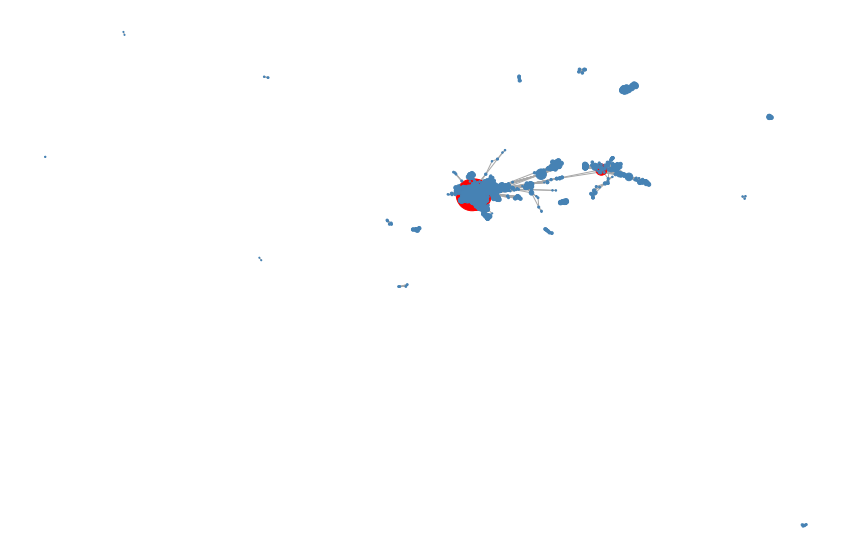

In [3]:
G.plot_network(max_node_size = 1000,
               max_connected_components = 'all',
               filename = 'all_comic_books_all_components')

# Maior Componente

Graph saved as ../TeX/Second set/img/all_comic_books_biggest_component.png


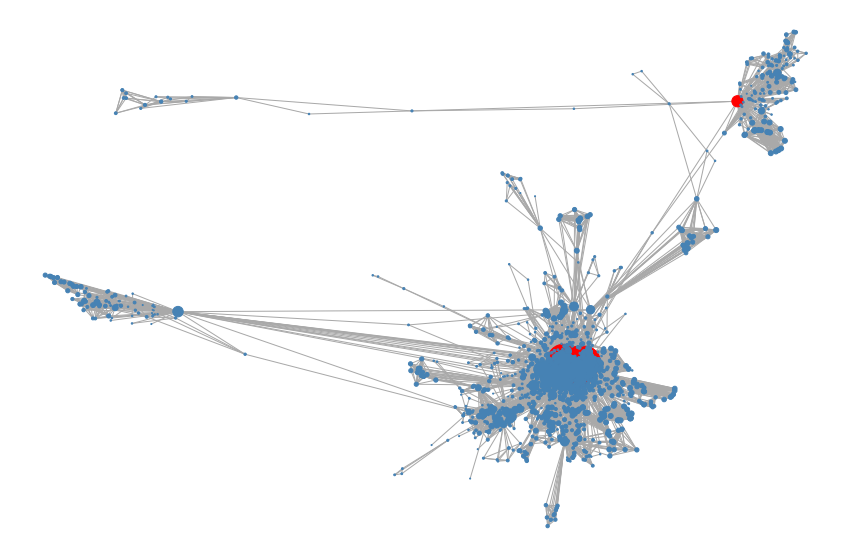

In [4]:
G.plot_network(max_node_size = 1000,
               filename = 'all_comic_books_biggest_component')

# Estatísticas Gerais

In [5]:
connected_components = list(nx.connected_components(G.Graph))
GN = G.Graph.number_of_nodes()
GL = G.Graph.number_of_edges()
G_degrees = np.array(G.Graph.degree)[:,1].astype(int)
G_density = 2 * GL / (GN * (GN - 1))
G_std_degree = G_degrees.std()
G_max_degree = G_degrees.max()
G_hbridges = has_bridges(G.Graph)
if G_hbridges:
    G_bridges = list(bridges(G.Graph))
    
print(nx.info(G.Graph))
print(f'Density: {G_density:.4f}')
print(f'Maximum degree: {G_max_degree}')
print(f'Degree Standard Deviation: {G_std_degree:.4f}')
print(f'Connected components: {len(connected_components)}')
if G_hbridges:
    print(f'Number of bridges: {len(G_bridges)}')
    print('Bridges:')
    for i in range(len(G_bridges)):
        print(f'{i + 1:2d} - {G_bridges[i]}')

Name: 
Type: Graph
Number of nodes: 2024
Number of edges: 14042
Average degree:  13.8755
Density: 0.0069
Maximum degree: 882
Degree Standard Deviation: 36.1471
Connected components: 16
Number of bridges: 38
Bridges:
 1 - ('Mônica', 'Toneco')
 2 - ('Magali', 'Anjo da Guarda da Magali')
 3 - ('Cascão', '#1tmj_10 Figurante 42')
 4 - ('Cascão', '#tdm_22 Atendente 5')
 5 - ('Maria Cebolinha', '#tdm_32 Figurante 6')
 6 - ('Marina', '#tdm_26 Animal 1')
 7 - ('Marina', '#tdm_26 Animal 2')
 8 - ('Marina', '#tdm_27 Animal 2')
 9 - ('Imperador Japonês Sec XVI', '#1tmj_03 Guarda 1')
10 - ('Astronauta', 'Astronauta do Futuro')
11 - ('Astronauta', '#tdm_34 Alien 1')
12 - ('Penadinho', '#tdm_20 Gato 1')
13 - ('Penadinho', '#tdm_24 Figurante 2')
14 - ('Zé Vampir', '#tdm_22 Criança 28')
15 - ('Bidu', '#tdm_32 Figurante 10')
16 - ('Piteco', '#tdm_20 Animal 1')
17 - ('Piteco', '#tdm_20 Dinossauro 3')
18 - ('Piteco', 'Gronk')
19 - ('Piteco', '#tdm_38 Dinossauro 1')
20 - ('Piteco', '#tdm_38 Dinossauro 2')


# Estatísticas Gerais (Maior Componente)

In [6]:
# working only with the greatest connected component
H = nx.subgraph(G.Graph, connected_components[0])
avg_distance = nx.average_shortest_path_length(H)
H_diameter = diameter(H)
H_degrees = np.array(H.degree)[:,1].astype(int)
HN = H.number_of_nodes()
HL = H.number_of_edges()
H_density = 2 * HL / (HN * (HN - 1))
H_std_degree = H_degrees.std()
H_max_degree = H_degrees.max()
H_hbridges = has_bridges(H)
if H_hbridges:
    H_bridges = list(bridges(H))

print(nx.info(H))
print(f'Density: {H_density:.4f}')
print(f'Maximum degree: {H_max_degree}')
print(f'Degree Standard Deviation: {H_std_degree:.4f}')
print(f'Diameter: {H_diameter}')
print(f'Average distance: {avg_distance:.4f}')
if H_hbridges:
    print(f'Number of bridges: {len(H_bridges)}')

print(f'ln(N)/ln(<k>): {np.log(HN) / np.log(2 * HL / HN):.4f}')
if H_hbridges:
    print('Bridges:')
    for i in range(len(H_bridges)):
        print(f'{i + 1:2d} - {H_bridges[i]}')

Name: 
Type: Graph
Number of nodes: 1901
Number of edges: 13343
Average degree:  14.0379
Density: 0.0074
Maximum degree: 882
Degree Standard Deviation: 37.2532
Diameter: 10
Average distance: 2.9886
Number of bridges: 35
ln(N)/ln(<k>): 2.8580
Bridges:
 1 - ('Mônica', 'Toneco')
 2 - ('Magali', 'Anjo da Guarda da Magali')
 3 - ('Cascão', '#1tmj_10 Figurante 42')
 4 - ('Cascão', '#tdm_22 Atendente 5')
 5 - ('Maria Cebolinha', '#tdm_32 Figurante 6')
 6 - ('Marina', '#tdm_26 Animal 1')
 7 - ('Marina', '#tdm_26 Animal 2')
 8 - ('Marina', '#tdm_27 Animal 2')
 9 - ('Imperador Japonês Sec XVI', '#1tmj_03 Guarda 1')
10 - ('Astronauta', 'Astronauta do Futuro')
11 - ('Astronauta', '#tdm_34 Alien 1')
12 - ('Penadinho', '#tdm_20 Gato 1')
13 - ('Penadinho', '#tdm_24 Figurante 2')
14 - ('Zé Vampir', '#tdm_22 Criança 28')
15 - ('Bidu', '#tdm_32 Figurante 10')
16 - ('Piteco', '#tdm_20 Animal 1')
17 - ('Piteco', '#tdm_20 Dinossauro 3')
18 - ('Piteco', 'Gronk')
19 - ('Piteco', '#tdm_38 Dinossauro 1')
20 - 

# Caminhos de maior distância

In [7]:
nodes = list(H.nodes())
paths = dict(shortest_path(H))
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        u = nodes[i]
        v = nodes[j]
        if len(paths[u][v]) == (H_diameter + 1):
            arrow = ' -> '
            print(f'Path from {u} to {v}:', arrow.join(paths[u][v]), sep = '\n')
            print()

Path from Verinha to #tdm_35 Indiazinha 1:
Verinha -> Rolo -> Tina -> Maurício de Souza -> Cascão -> Irmãs Cebolinhas -> Chico Bento -> Onça -> Papa-Capim -> Jurema -> #tdm_35 Indiazinha 1

Path from Verinha to #tdm_35 Índio:
Verinha -> Rolo -> Tina -> Maurício de Souza -> Cascão -> Irmãs Cebolinhas -> Chico Bento -> Onça -> Papa-Capim -> Jurema -> #tdm_35 Índio

Path from Verinha to #tdm_35 Índia:
Verinha -> Rolo -> Tina -> Maurício de Souza -> Cascão -> Irmãs Cebolinhas -> Chico Bento -> Onça -> Papa-Capim -> Jurema -> #tdm_35 Índia

Path from Verinha to #tdm_35 Figurante 4:
Verinha -> Rolo -> Tina -> Maurício de Souza -> Cascão -> Irmãs Cebolinhas -> Chico Bento -> Onça -> Papa-Capim -> Jurema -> #tdm_35 Figurante 4

Path from Verinha to #tdm_35 Indiazinha 2:
Verinha -> Rolo -> Tina -> Maurício de Souza -> Cascão -> Irmãs Cebolinhas -> Chico Bento -> Onça -> Papa-Capim -> Jurema -> #tdm_35 Indiazinha 2

Path from Verinha to #tdm_35 Indiazinha 3:
Verinha -> Rolo -> Tina -> Maurício d

In [8]:
nodes = list(H.nodes())
paths = dict(shortest_path(H))
character_to_fig = []
fig_to_fig = []
printed = False
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        u = nodes[i]
        v = nodes[j]
        if len(paths[u][v]) == (H_diameter + 1):
            if u[0] != '#' and v[0] != '#':
                arrow = ' -> '
                print(f'Path from {u} to {v}:', arrow.join(paths[u][v]), sep = '\n')
                print()
                printed = True
            elif u[0] != '#' or v[0] != '#':
                character_to_fig.append([u, v])
            else:
                fig_to_fig.append([u, v])
                
if not printed:
    if len(character_to_fig) > 0:
        u, v = character_to_fig[0]
        print(f'Path from {u} to {v}:', arrow.join(paths[u][v]), sep = '\n')
    else:
        u, v = fig_to_fig[0]
        print(f'Path from {u} to {v}:', arrow.join(paths[u][v]), sep = '\n')

Path from Verinha to #tdm_35 Indiazinha 1:
Verinha -> Rolo -> Tina -> Maurício de Souza -> Cascão -> Irmãs Cebolinhas -> Chico Bento -> Onça -> Papa-Capim -> Jurema -> #tdm_35 Indiazinha 1


# Comunidades

Graph saved as ../TeX/Second set/img/communities_all_components.png


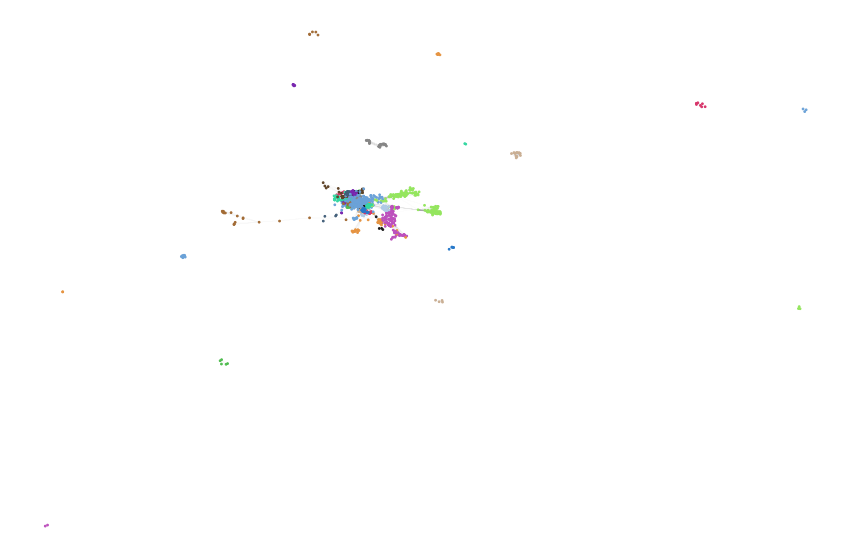

In [9]:
G.plot_communities(max_connected_components = 'all',
                   filename = 'communities_all_components')

Graph saved as ../TeX/Second set/img/communities_biggest_component.png


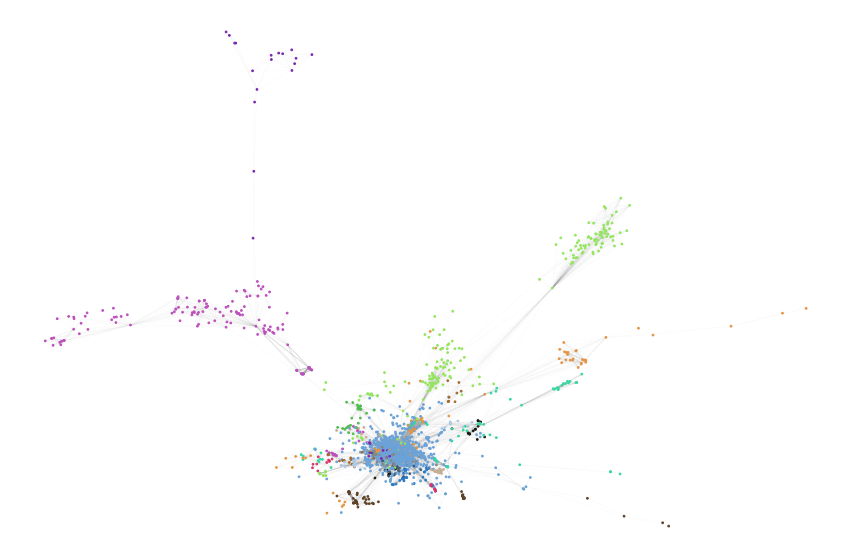

In [10]:
G.plot_communities(filename = 'communities_biggest_component')

# Distribuição de Graus

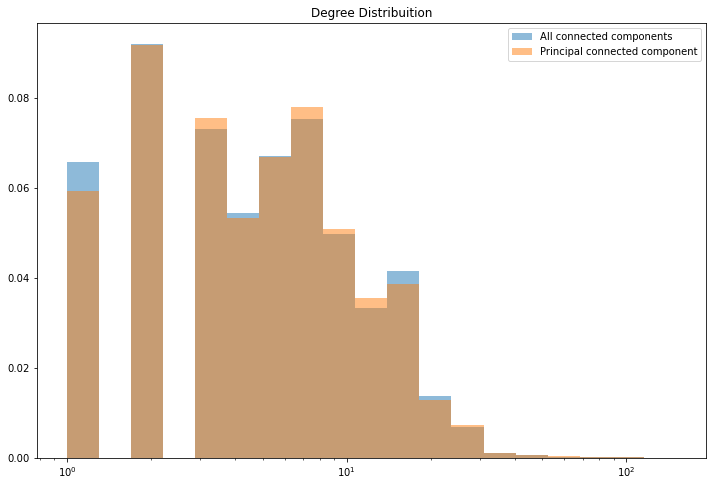

In [11]:
# degree distribuition
bins = np.logspace(start = np.log10(1), stop = np.log10(150), num = 20)
plt.figure(figsize = (12, 8))
plt.xscale('log')
plt.hist(G_degrees,
         bins = bins,
         density = True,
         alpha = 0.5,
         label = 'All connected components')

plt.hist(H_degrees,
         bins = bins,
         density = True,
         alpha = 0.5,
         label = 'Principal connected component')

plt.legend(loc = 'upper right')
plt.title('Degree Distribuition')
plt.savefig('../TeX/Second set/img/degree_distribuition.png')
plt.show()

# Distribuição de Pesos

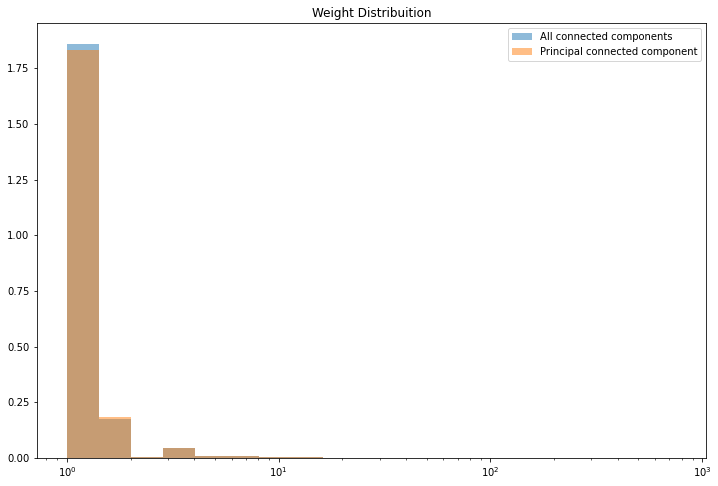

In [12]:
# weight distribuition
bins = np.logspace(start = np.log10(1), stop = np.log10(750), num = 20)
plt.figure(figsize = (12, 8))
plt.xscale('log')
plt.hist([float(G.Graph[u][v]['weight']) for u, v in G.Graph.edges()],
         bins = bins,
         density = True,
         alpha = 0.5,
         label = 'All connected components')

plt.hist([float(H[u][v]['weight']) for u, v in H.edges()],
         bins = bins,
         density = True,
         alpha = 0.5,
         label = 'Principal connected component')

plt.legend(loc = 'upper right')
plt.title('Weight Distribuition')
plt.savefig('../TeX/Second set/img/weight_distribuition.png')
plt.show()

# Coeficiente de Clustering

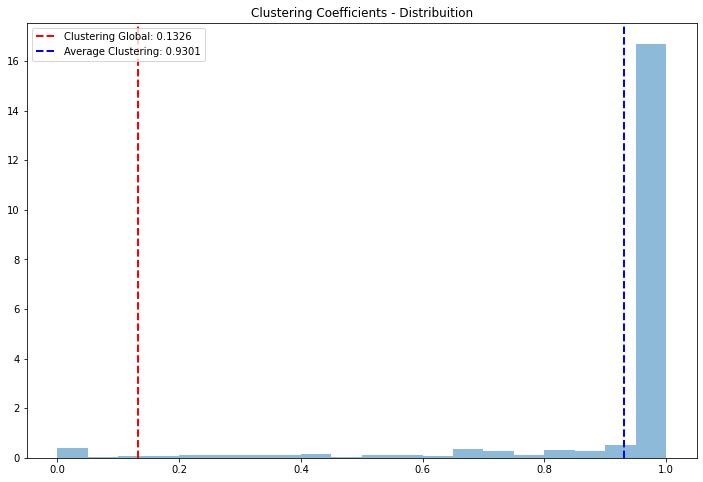

In [13]:
graph_clustering = clustering(H)
avg_clustering = average_clustering(H)
global_clustering = transitivity(H)

# clustering coefficients distribuition
plt.figure(figsize = (12, 8))
plt.hist(list(graph_clustering.values()),
         bins = 20,
         density = True,
         alpha = 0.5)

plt.axvline(global_clustering,
            color = 'r',
            linestyle = 'dashed',
            linewidth = 2,
            label = 'Clustering Global: {:.4f}'.format(global_clustering))

plt.axvline(avg_clustering,
            color = 'b',
            linestyle = 'dashed',
            linewidth = 2,
            label = 'Average Clustering: {:.4f}'.format(avg_clustering))

plt.legend(loc = 'upper left')
plt.title('Clustering Coefficients - Distribuition')
plt.savefig('../TeX/Second set/img/clustering_coefficients_distribuition_without_marks.png')
plt.show()

# Comparação com Erdos-Renyi

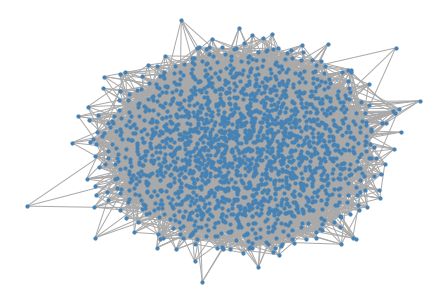

In [15]:
p_ER_Graph = H_density
ER_n_nodes = HN
ER_Graph = nx.Graph()
for u in range(ER_n_nodes):
    for v in range(u + 1, ER_n_nodes):
        if np.random.random() < p_ER_Graph:
            ER_Graph.add_edge(u, v)
            
nx.draw(ER_Graph,
        node_size = 10,
        edge_color = 'darkgray',
        node_color = 'steelblue')

# Comparação da distribuição de graus

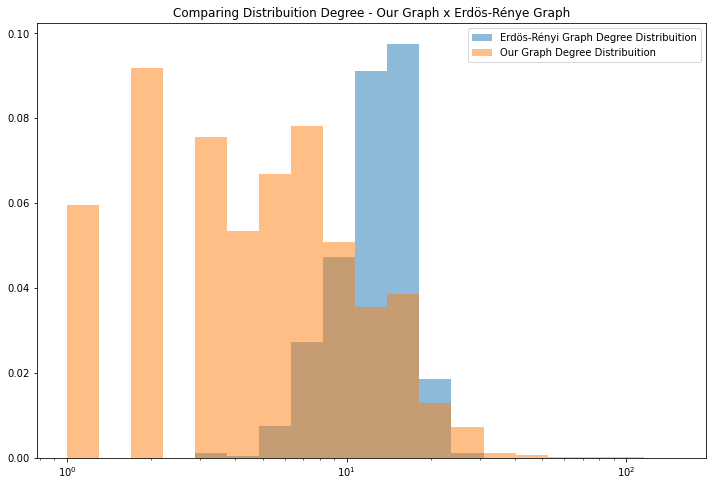

In [16]:
# comparing degree distribuitions
diff = max(H_degrees) - min(H_degrees)
len_bin = diff/100
bins = [min(H_degrees) + diff/100 * i for i in range(101)]
bins = np.logspace(start = np.log10(1), stop = np.log10(150), num = 20)
plt.figure(figsize = (12, 8))
plt.xscale('log')
plt.hist(list(np.array(ER_Graph.degree)[:,1].astype(int)),
         bins = bins,
         density = True,
         alpha = 0.5,
         label = 'Erdös-Rényi Graph Degree Distribuition')

plt.hist(H_degrees,
         bins = bins,
         density = True,
         alpha = 0.5,
         label = 'Our Graph Degree Distribuition')

plt.legend(loc = 'upper right')
plt.title('Comparing Distribuition Degree - Our Graph x Erdös-Rénye Graph')
plt.savefig('../TeX/Second set/img/degree_comparition.png')
plt.show()

# Maiores Hubs fora os protagonistas

In [17]:
D = np.array(H.degree(weight = 'weight'))
D = list(sorted(D, key = lambda x : float(x[1]), reverse = True))
D = [list(d) for d in D]
i = 0

while i < len(D):
    if D[i][0] in ['Mônica', 'Cebolinha', 'Magali', 'Cascão', 'Chico Bento']:
        D.remove(D[i])
    else:
        i += 1
        
D

[['Franjinha', '875.5'],
 ['Denise', '758.0'],
 ['Sansão', '726.0'],
 ['Astronauta', '564.0'],
 ['Xabéu', '556.0'],
 ['Xaveco', '404.0'],
 ['Carminha Frufru', '400.0'],
 ['Robô', '386.0'],
 ['Capitão Feio', '380.0'],
 ['Marina', '339.5'],
 ['Dona Luísa', '330.5'],
 ['Maria Cascuda', '305.0'],
 ['Bidu', '293.5'],
 ['Princesa Usagi Mimi', '292.5'],
 ['Anjinho', '277.0'],
 ['Coelho Caolho', '269.0'],
 ['Penadinho', '258.5'],
 ['Tonhão da Rua de Baixo', '245.5'],
 ['Zé Luís', '222.0'],
 ['Piteco', '220.5'],
 ['Seu Cebola', '219.5'],
 ['#1tmj_06 Robô Tzk 1', '212.0'],
 ['Titi', '208.0'],
 ['#1tmj_06 Robô Tzk 2', '208.0'],
 ['#1tmj_06 Robô Tzk 3', '208.0'],
 ['Yuka', '203.5'],
 ['Dudu', '199.0'],
 ['#1tmj_06 Robô Tzk 4', '197.0'],
 ['#1tmj_06 Robô Tzk 5', '197.0'],
 ['Zé Vampir', '195.5'],
 ['#1tmj_04 Figurante 8', '185.5'],
 ['#1tmj_04 Figurante 9', '185.5'],
 ['#1tmj_04 Figurante 10', '185.5'],
 ['#1tmj_04 Figurante 11', '185.5'],
 ['#1tmj_04 Figurante 12', '185.5'],
 ['Raposão', '183.5'],

In [18]:
D = np.array(H.degree())
D = list(sorted(D, key = lambda x : float(x[1]), reverse = True))
D = [list(d) for d in D]
i = 0

while i < len(D):
    if D[i][0] in ['Mônica', 'Cebolinha', 'Magali', 'Cascão', 'Chico Bento']:
        D.remove(D[i])
    else:
        i += 1
        
D

[['Denise', '194'],
 ['Sansão', '179'],
 ['Franjinha', '151'],
 ['Carminha Frufru', '130'],
 ['Bidu', '120'],
 ['Xaveco', '116'],
 ['Marina', '106'],
 ['Dona Luísa', '104'],
 ['Astronauta', '101'],
 ['Dudu', '98'],
 ['Piteco', '97'],
 ['Anjinho', '89'],
 ['Maria Cascuda', '82'],
 ['Xabéu', '78'],
 ['Seu Cebola', '77'],
 ['Nimbus', '75'],
 ['Mingau', '73'],
 ['Capitão Feio', '71'],
 ['#tdm_23 Duende', '70'],
 ['Robô', '69'],
 ['Tonhão da Rua de Baixo', '68'],
 ['Bloguinho', '67'],
 ['Penadinho', '64'],
 ['Zé Luís', '64'],
 ['Princesa Usagi Mimi', '64'],
 ['Titi', '63'],
 ['Maurício de Souza', '62'],
 ['Louco', '55'],
 ['Professor Spada / Doutor Spam', '55'],
 ['Luca', '54'],
 ['Fabinho Boa Pinta', '53'],
 ['Zé Lelé', '51'],
 ['Jotalhão', '49'],
 ['Dorinha', '49'],
 ['Cleópatra Esfíngia', '49'],
 ['Jeremias', '48'],
 ['Frank', '47'],
 ['Quinzinho', '46'],
 ['Humberto', '46'],
 ['Dona Cebola', '45'],
 ['Zé Vampir', '45'],
 ['Maria Cebolinha', '44'],
 ['Do Contra', '42'],
 ['Alfacinha', '4

# Melhores Amigos

In [19]:
best_friends = {}
for character in H.nodes():
    best_friend_list = []
    for i in range(3):
        best_friend = None
        best_friend_relantions = 0
        for connection in H[character]:
            if connection not in best_friend_list and H[character][connection]['weight'] > best_friend_relantions:
                best_friend = connection
                best_friend_relantions = H[character][connection]['weight']
        
        if best_friend != None:
            best_friend_list.append(best_friend)
            
    best_friends[character] = best_friend_list

best_friends

{'Mônica': ['Cebolinha', 'Magali', 'Cascão'],
 'Cebolinha': ['Mônica', 'Cascão', 'Magali'],
 'Magali': ['Mônica', 'Cebolinha', 'Cascão'],
 'Cascão': ['Cebolinha', 'Mônica', 'Magali'],
 'Yuka': ['Capitão Feio', 'Mônica', 'Cebolinha'],
 'Kraker': ['Mônica', 'Cebolinha', 'Cascão'],
 'Dona Luísa': ['Mônica', 'Magali', 'Seu Antenor'],
 'Sansão': ['Mônica', 'Cebolinha', 'Cascão'],
 'Seu Souza': ['Mônica', 'Dona Luísa', 'Sansão'],
 'Dona Lurdinha': ['Cascão', 'Cebolinha', 'Mônica'],
 'Seu Antenor': ['Dona Luísa', 'Seu Cebola', 'Dona Lili'],
 'Seu Cebola': ['Cebolinha', 'Cascão', 'Seu Antenor'],
 'Maria Cebolinha': ['Floquinho', 'Cebolinha', 'Dona Cebola'],
 'Dona Cebola': ['Cebolinha', 'Cascão', 'Mônica'],
 'Seu Carlito': ['Magali', 'Mingau', 'Aveia'],
 'Mingau': ['Magali', 'Mônica', 'Cascão'],
 'Aveia': ['Magali', 'Seu Carlito', 'Mingau'],
 'Dona Lili': ['Dona Luísa', 'Seu Cebola', 'Seu Antenor'],
 'Marina': ['Mônica', 'Cebolinha', 'Denise'],
 'Franjinha': ['Cebolinha', 'Cascão', 'Magali'],
